# Three models were chosen Linear, log, sigmoid the best R2_socre was from Linear So linear model is accepted

### R2_scores are as follow:
- Linear_regression: 0.68
- Log: 0.5
- Segmoid: - 0.78

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housePrice.csv")

df = df.dropna().copy()

df["Area"] = pd.to_numeric(df["Area"], errors="coerce")

df = df.dropna(subset=["Area"])

df = df[(df["Area"] > 20) & (df["Area"] < 400)]

df.to_csv("clean_housePrice.csv", index=False)

print(df.head())
print(f"Data to work wiht: {len(df)}")

    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
Data to work wiht: 3412


In [3]:
df2 = df[["Area","Room", "Parking", "Warehouse", "Elevator", "Price", "Price(USD)"]]
df2.tail()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
3474,86.0,2,True,True,True,3.500000e+09,116666.67
3475,83.0,2,True,True,True,6.800000e+09,226666.67
3476,75.0,2,False,False,False,3.650000e+08,12166.67
3477,105.0,2,True,True,True,5.600000e+09,186666.67
3478,82.0,2,False,True,True,3.600000e+08,12000.00


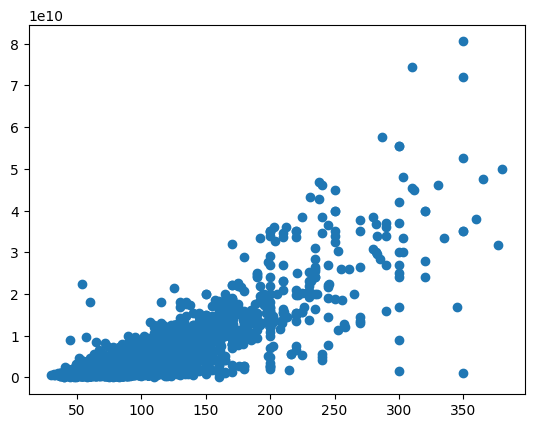

In [4]:
plt.scatter(df["Area"], df["Price"])
plt.show()

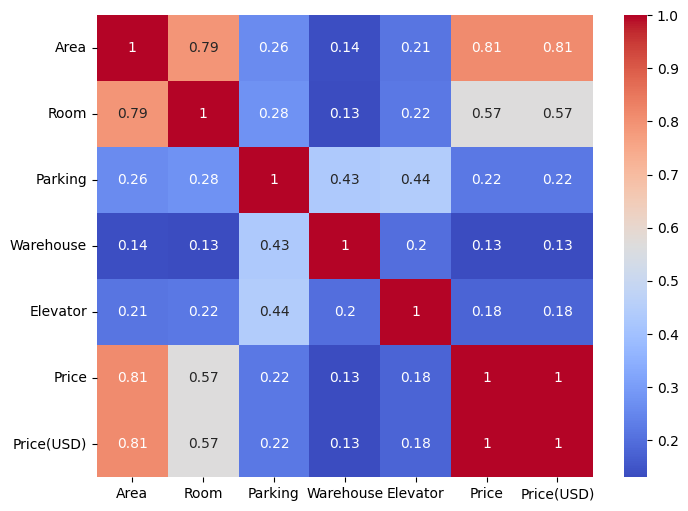

In [5]:
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Linear Regression

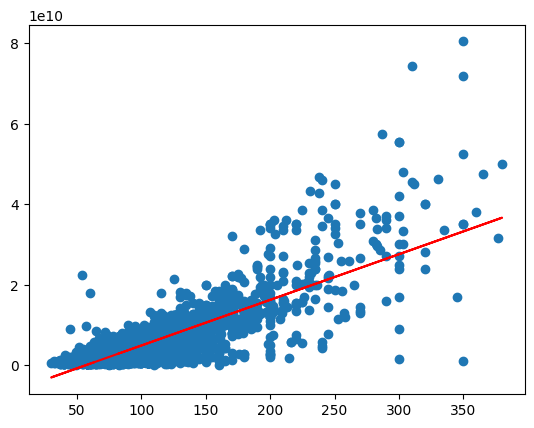

In [6]:
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

from sklearn import linear_model

model = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Area"]])
train_y = np.asanyarray(train[["Price"]])

model.fit(train_x, train_y)

plt.scatter(df["Area"], df["Price"])

plt.plot(train_x, model.intercept_[0] + train_x * model.coef_[0][0], color="red")

plt.show()


In [38]:
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# change true false to int
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

train_x = np.asanyarray(train[["Area","Room", "Parking", "Warehouse", "Elevator"]])
train_y = np.asanyarray(train[["Price"]])
regr.fit(train_x, train_y)

print(regr.coef_)
print(regr.intercept_)

[[ 1.28843709e+08 -1.64688571e+09  7.05723743e+07  5.06693196e+08
   2.22105932e+08]]
[-5.37947312e+09]


In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["Area","Room", "Parking", "Warehouse", "Elevator"]])
test_y = np.asanyarray(test[["Price"]])
test_y_ = regr.predict(test_x)

r2_score(test_y, test_y_)

0.6942668975001853

In [10]:
new_house  = np.array([[150, 3, True, True, False]])
pred = regr.predict(new_house)
pred

array([[9.40069605e+09]])

## R2 score is a little low let's try other models

# Non-linear Regression

beta_1 = 0.0136, beta_2 = 312.5158
R2 -0.78:


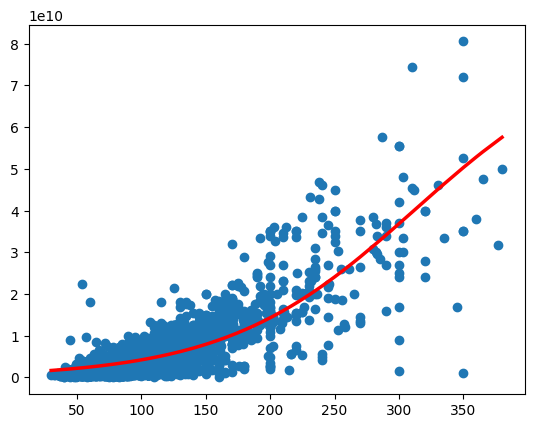

In [36]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

x = df["Area"].values
y = df["Price"].values / df["Price"].max()

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# p0 is the start of curve fit meaning beta_1 = 0.01 that means slope and beta_2 is the other one means start from middle
popt, pcov = curve_fit(sigmoid, x, y, p0=[0.01, np.median(x)]) 
beta_1, beta_2 = popt
print(f"beta_1 = {beta_1:.4f}, beta_2 = {beta_2:.4f}")

x_sorted = np.sort(x)
y_pred = sigmoid(x_sorted, beta_1, beta_2) * df["Price"].max()

plt.scatter(df["Area"], df["Price"])
plt.plot(x_sorted, y_pred, color="red", linewidth= 2.5)

y = y * df["Price"].max()
print(f"R2 %.2f:" % r2_score(y, y_pred))

plt.show()


## Not Accepted Due to Bad R2 score

# Log plot

0.5078690898094755

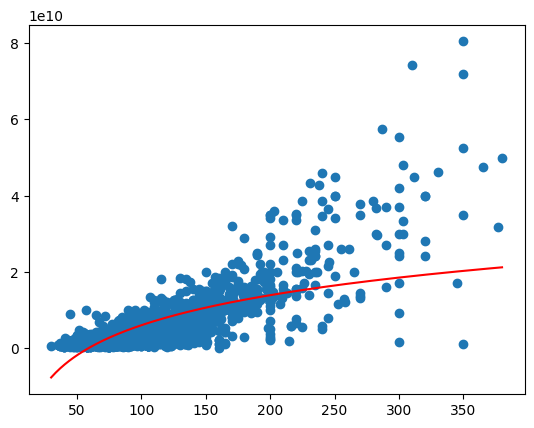

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

X = np.asanyarray(train[["Area"]])
train_x = np.log(X)
train_y = np.asanyarray(train[["Price"]])

model = LinearRegression()
model.fit(train_x, train_y)

area_range = np.linspace(df2["Area"].min(), df2["Area"].max(), 200)
price_pred = model.predict(np.log(area_range).reshape(-1, 1))

plt.scatter(X, train_y)
plt.plot(area_range, price_pred, color="red")

test_x = np.log(np.asanyarray(test[["Area"]]))
test_y = np.asanyarray(test[["Price"]])
test_y_ = model.predict(test_x)

r2_score(test_y, test_y_)

## Not Acepted Due to low R2

# Linear Regression multiple wiht Price(USD)

In [51]:
from sklearn import linear_model
from sklearn.metrics import r2_score

msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

regr = linear_model.LinearRegression()

# change true false to int
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

train_x = np.asanyarray(train[["Area","Room", "Parking", "Warehouse", "Elevator"]])
train_y = np.asanyarray(train[["Price(USD)"]])
regr.fit(train_x, train_y)

print(regr.coef_)
print(regr.intercept_)

test_x = np.asanyarray(test[["Area","Room", "Parking", "Warehouse", "Elevator"]])
test_y = np.asanyarray(test[["Price(USD)"]])
test_y_ = regr.predict(test_x)

print("R2: %.2f" % r2_score(test_y, test_y_))

[[  4550.46207541 -63984.2845966    3898.79446272  20012.34365589
    4314.01848602]]
[-187250.21944255]
R2: 0.68


In [71]:
new_house_USD = np.array([[120, 2, False, False, True]])
print(f"House Price As USD: ${regr.predict(new_house_USD)[0][0]}")

House Price As USD: $235150.67889910273
